In [6]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import numpy
from matplotlib import pyplot
import pandas
from my_machine_learning.conf import csv_explorer

In [7]:
data = pandas.read_csv(csv_explorer('players.csv'))

In [8]:
df = pandas.DataFrame(data=data, columns=['height', 'weight', 'spike', 'block'])

In [9]:
pandas.pivot_table(df, values=['height', 'spike'], index=['weight'], aggfunc={'height': numpy.mean, 'spike': numpy.mean})[:3]

,height,spike
weight,,
50,176.0,249.0
51,165.0,250.0
52,150.0,255.0


In [10]:
X = df[['height', 'weight']]
y = df['spike']

<BarContainer object of 476 artists>

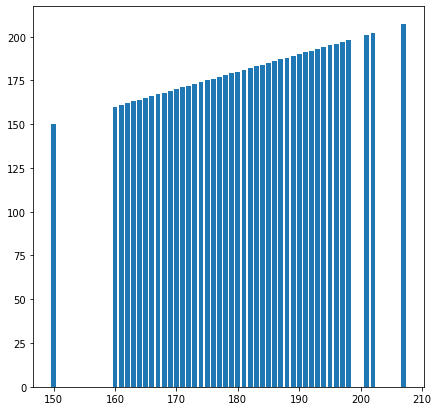

In [55]:
# pyplot.figure(figsize=(7, 7))
# pyplot.plot(df['height'], 'ro')
# pyplot.bar(df['height'], df['height'])
# pyplot.scatter(df['height'], df['spike'], c='r')
# pyplot.ylabel = 'Height'
# pyplot.xlabel = 'Count'
# pyplot.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [39]:
model = Perceptron()
model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
observation = [[175, 56]]
prediction = model.predict(observation)

print('If the player height is %s then her spike would be %s' % (observation[0][0], round(prediction[0], 1)))

If the player height is 175 then her spike would be 287.0


In [50]:
predictions = model.predict(X_test)
predictions

array([287., 287., 287., 287., 308., 287., 287., 287., 287., 287., 287.,
       287., 287., 287., 308., 308., 287., 287., 287., 287., 287., 287.,
       287., 287., 287., 287., 287., 287., 287., 308., 287., 287., 308.,
       287., 287., 287., 287., 287., 287., 287., 287., 287., 287., 287.,
       308., 308., 287., 287., 287., 287., 287., 287., 287., 308., 287.,
       287., 287., 308., 287., 287., 287., 287., 287., 287., 287., 287.,
       287., 308., 287., 287., 308., 287., 308., 287., 287., 287., 287.,
       287., 287., 308., 287., 287., 287., 287., 287., 287., 287., 287.,
       287., 287., 308., 308., 287., 287., 287., 287., 287., 287., 308.,
       287., 287., 287., 287., 287., 287., 287., 287., 287., 287., 287.,
       287., 287., 308., 308., 287., 287., 308., 287., 287.])

In [42]:
predictions[:2]

array([287., 287.])

In [43]:
accuracy = metrics.accuracy_score(y_test, predictions)
print('The accuracy score is %s' % accuracy)

The accuracy score is 0.0


In [44]:
loss = metrics.hamming_loss(y_test, predictions)
print('The nummber of values to shift to obtain a correct prediction is %s' % loss)

The nummber of values to shift to obtain a correct prediction is 1.0


In [45]:
score = model.score(X_test, y_test)
print('The model score is %s' % score)

The model score is 0.0


In [46]:
s = metrics.r2_score(y_test, predictions)
print('The percentage at which the data fits the model is: %s' % s)

The percentage at which the data fits the model is: -0.14518256534395801


In [47]:
# Saving the model
import pickle

with open('perceptron.sav', 'wb') as m:
    pickle.dump(model, m)

In [48]:
with open('perceptron.sav', 'rb') as m:
    loaded_model = pickle.load(m)

loaded_model.predict([[196, 78]])

array([287.])